In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
cData = pd.read_csv("Cars-clean.csv")  
cData.shape

(6019, 16)

In [3]:
cData.head()

,S.No.,Brand,Class,Model,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,Wagon R LXI CNG,wagon,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai,Creta 1.6 CRDi SX Option,creta,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda,Jazz V,jazz,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti,Ertiga VDI,ertiga,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi,A4 New 2.0 TDI Multitronic,a4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Since the focus is on the PCA technique, we will drop the non-numerica variables

In [6]:
# iterating the columns
for col in cData.columns:
    print(col)

S.No.
Brand
Class
Model
Name
Location
Year
Kilometers_Driven
Fuel_Type
Transmission
Owner_Type
Mileage
Engine
Power
Seats
Price


In [7]:
cData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Brand              6019 non-null   object 
 2   Class              6019 non-null   object 
 3   Model              6019 non-null   object 
 4   Name               6019 non-null   object 
 5   Location           6019 non-null   object 
 6   Year               6019 non-null   int64  
 7   Kilometers_Driven  6019 non-null   int64  
 8   Fuel_Type          6019 non-null   object 
 9   Transmission       6019 non-null   object 
 10  Owner_Type         6019 non-null   object 
 11  Mileage            6019 non-null   float64
 12  Engine             6019 non-null   float64
 13  Power              6019 non-null   float64
 14  Seats              6019 non-null   float64
 15  Price              6019 non-null   float64
dtypes: float64(5), int64(3),

In [8]:
#dropping/ignoring categorical, seats and serie No.
cData = cData.drop([
    'S.No.',
    'Brand',
    'Class',
    'Model',
    'Name',
    'Location',
    'Fuel_Type',
    'Transmission',
    'Owner_Type',
    'Seats'
], 
    axis=1)
cData.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
0,2010,72000,26.60,998.0,58.16,1.75
1,2015,41000,19.67,1582.0,126.20,12.50
2,2011,46000,18.20,1199.0,88.70,4.50
3,2012,87000,20.77,1248.0,88.76,6.00
4,2013,40670,15.20,1968.0,140.80,17.74


### BiVariate Plots

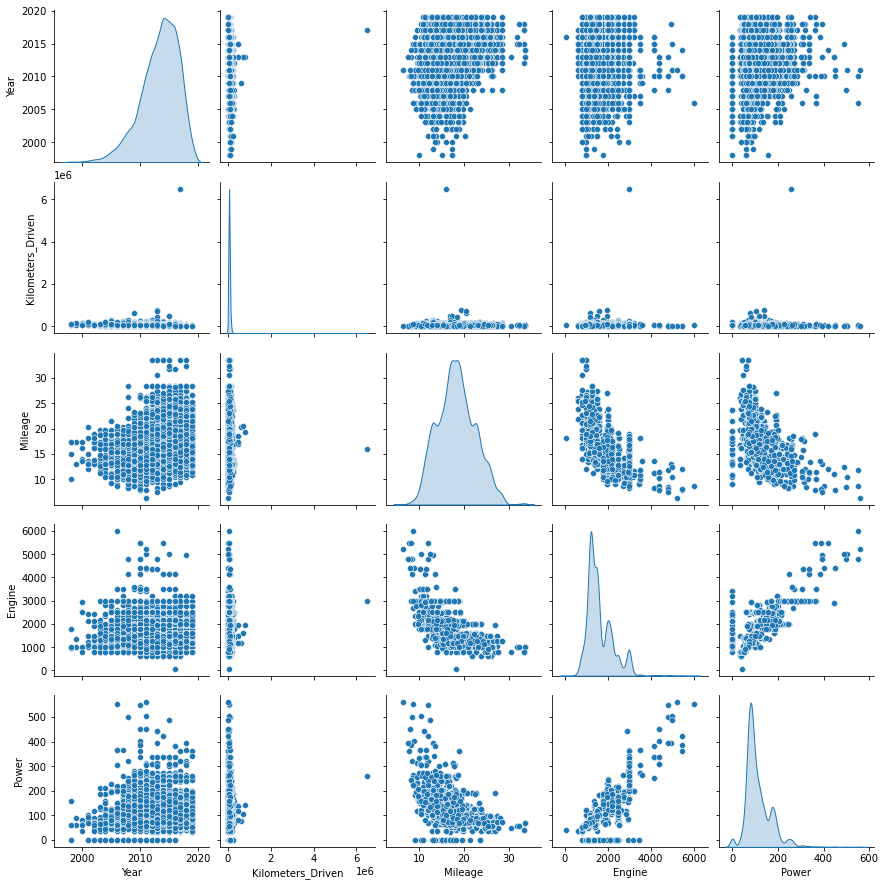

In [11]:
#independant variables
X = cData.drop(['Price'], axis=1)
# the dependent variable
y = cData[['Price']]

sns.pairplot(X, diag_kind='kde')   # to plot density curve instead of histogram on the dia

#### Scaling Data

In [12]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,Year,Kilometers_Driven,Mileage,Engine,Power
0,-1.027139,0.145315,1.989653,-1.036251,-0.953517
1,0.502161,-0.194369,0.325164,-0.063653,0.271731
2,-0.721279,-0.139581,-0.027909,-0.701504,-0.403560
3,-0.415419,0.309678,0.589369,-0.619899,-0.402479
4,-0.109559,-0.197985,-0.748467,0.579193,0.534645


In [13]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00016617 -0.17307632  0.29616977 -0.0490611   0.07350986]
 [-0.17307632  1.00016617 -0.06546046  0.09062652  0.02401417]
 [ 0.29616977 -0.06546046  1.00016617 -0.6417056  -0.51649394]
 [-0.0490611   0.09062652 -0.6417056   1.00016617  0.84090103]
 [ 0.07350986  0.02401417 -0.51649394  0.84090103  1.00016617]]


In [14]:
pca = PCA(n_components=5)
pca.fit(XScaled)

PCA(n_components=5)

### The Eigen Values

In [15]:
print(pca.explained_variance_)

[2.36858297 1.21766686 0.8874639  0.38744128 0.13967582]


### The Eigen Vectors

In [16]:
print(pca.components_)

[[-0.11754824  0.09061669 -0.53070569  0.60938961  0.57005859]
 [-0.74899785  0.56547139 -0.17363794 -0.12717021 -0.2700406 ]
 [ 0.48960582  0.81414299  0.26929378  0.08120118  0.13544213]
 [ 0.42941127  0.08608998 -0.76761467 -0.20496486 -0.42065616]
 [ 0.03281362 -0.04231352  0.16263432  0.75091132 -0.63782059]]


### The percentage of variation explained by each eigen Vector

In [17]:
print(pca.explained_variance_ratio_)

[0.47363789 0.24349291 0.17746329 0.07747538 0.02793052]


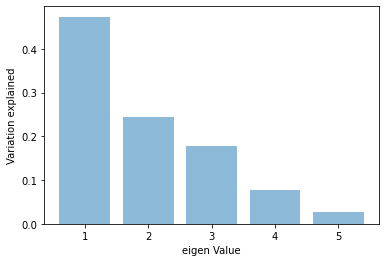

In [26]:
plt.bar(list(range(1,6)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

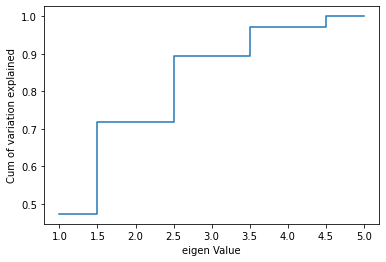

In [27]:
plt.step(list(range(1,6)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

### Dimensionality Reduction

Now 4 dimensions seems very reasonable. With 4 variables we can explain over 95% of the variation in the original data!

In [20]:
pca4 = PCA(n_components=4)
pca4.fit(XScaled)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(XScaled)

[[-0.11754824  0.09061669 -0.53070569  0.60938961  0.57005859]
 [-0.74899785  0.56547139 -0.17363794 -0.12717021 -0.2700406 ]
 [ 0.48960582  0.81414299  0.26929378  0.08120118  0.13544213]
 [ 0.42941127  0.08608998 -0.76761467 -0.20496486 -0.42065616]]
[0.47363789 0.24349291 0.17746329 0.07747538]


In [22]:
Xpca4

array([[-2.09705497,  0.89528508, -0.06207572, -1.34234414],
       [-0.1330947 , -0.60777234,  0.20681649, -0.15195912],
       [-0.57059375,  0.66434083, -0.5859192 ,  0.01322545],
       ...,
       [ 1.49527201,  0.27776156, -0.39504128,  0.30749785],
       [-1.15745351,  0.32457704, -0.32100561,  0.37907855],
       [-2.07864002,  0.57552454, -0.22013007, -0.99531252]])

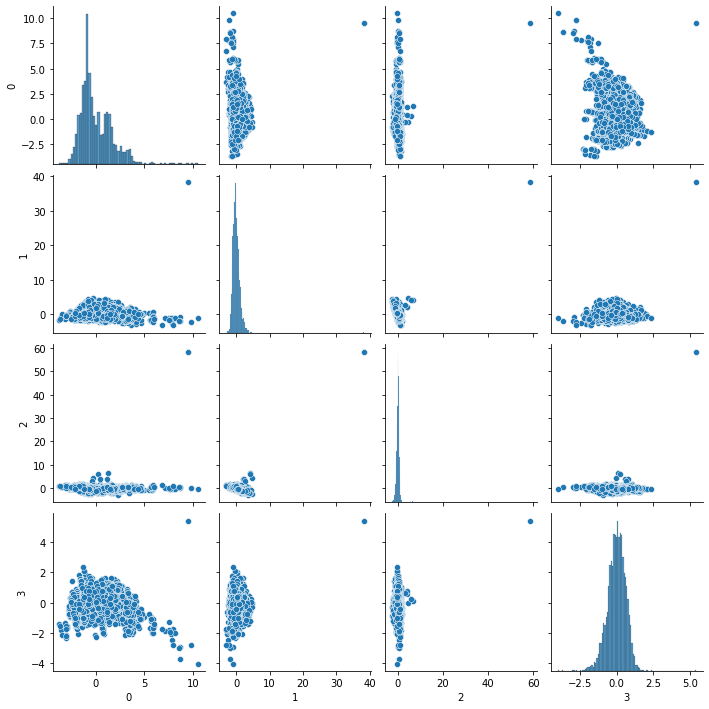

In [23]:
sns.pairplot(pd.DataFrame(Xpca4))

### Fit Linear Model

Lets construct two linear models. The first with all the 5 independent variables and the second with only the 4 new variables constructed using PCA.

In [24]:
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.6468371222098372

In [25]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca4, y)
regression_model_pca.score(Xpca4, y)

0.639104307852932

Looks like by drop reducing dimensionality by 4, we only dropped around 0.77% in R^2! This is insample (on training data) and hence a drop in R^2 is expected. Still seems easy to justify the dropping of variables. An out of sample (on test data), with the 4 independent variables is likely to do better since that would be less of an over-fit.